# SCC0270 - Neural Networks and Deep Learning
## First Practical Project
### Student: Eduardo Amaral
### NUSP: 11735021
#### [Project Description](https://github.com/rolimans/scc0270-p1/blob/main/projectDescription.pdf)



## Project Setup

#### Importing the necessary libraries



In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils.validation import check_array
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### Downloading the train and test datasets

In [2]:
!rm -rf data
!mkdir data
!wget https://github.com/rolimans/scc0270-p1/raw/main/data/train.csv -O data/train.csv
!wget https://github.com/rolimans/scc0270-p1/raw/main/data/test.csv -O data/test.csv

--2023-05-17 03:41:08--  https://github.com/rolimans/scc0270-p1/raw/main/data/train.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rolimans/scc0270-p1/main/data/train.csv [following]
--2023-05-17 03:41:08--  https://raw.githubusercontent.com/rolimans/scc0270-p1/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76079487 (73M) [text/plain]
Saving to: ‘data/train.csv’

data/train.csv      100%[===================>]  72.55M   205MB/s    in 0.4s    

2023-05-17 03:41:09 (205 MB/s) - ‘data/train.csv’ saved [76079487/76079487]

--2023-05-17 03:41:09--  https://github.com/rolimans

## Exploring the dataset

### Importing and Quick Look

Initially both train and test datasets are imported using the `Pandas` library.
Then the attributes are separated from the target class and stored in separate variables.

The shape of the variables is analyzed and it is noticeable that both train and test datasets have similar sizes (something that should not cause problems), and that we have 28 attributes to deal with.

A quick look into the first 5 elements of both datasets is enough to realize that all the attributes are numerical and seem to have no direct meaning (anonymized).

In [3]:
trainDf = pd.read_csv('data/train.csv')
testDf = pd.read_csv('data/test.csv')

X_train, y_train = trainDf.iloc[:,:-1], trainDf.iloc[:,-1]
X_test, y_test = testDf.iloc[:,:-1], testDf.iloc[:,-1]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

display(X_train.head())
display(X_test.head())

(142404, 28) (142403, 28)
(142404,) (142403,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.439952,0.683758,1.225814,0.639113,0.716765,0.089295,0.657718,0.034213,-0.472679,0.352698,...,0.463212,0.211867,0.127443,0.588590,-0.145728,-0.322900,-0.299744,-0.310295,0.248317,-0.011493
1,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,-8.745973,...,1.385610,0.667310,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944
2,1.013114,-0.334412,1.305208,0.837406,-1.126833,-0.064321,-0.594753,0.147737,0.536360,-0.120472,...,0.148289,0.069161,0.017079,0.112210,-0.016084,0.595033,0.201073,0.278215,0.007457,0.030762
3,0.969231,-0.233554,0.238473,0.145793,-0.545741,-0.970680,0.347393,-0.209522,-0.342571,-0.100331,...,0.443652,0.240978,-0.362820,-1.417272,0.162136,0.541628,-0.079465,0.268702,-0.101237,0.028234
4,-0.856523,1.080875,1.866956,1.729941,-0.161741,0.028789,0.401787,0.043774,-0.213916,0.155907,...,1.391628,-0.068915,0.007365,0.077392,-0.221906,0.394141,0.237225,-0.080102,-0.291408,0.092140


### Minimums and Maximums

After exploring all attributes minumuns and maximuns it is perceptible that no definite range exists. This indicates that some form of standardization may be necessary for some ML algorithms.

In [4]:
pd.DataFrame({
    'X_train.min:': X_train.min(),
    'X_train.max:': X_train.max(),
    'X_test.min:': X_test.min(),
    'X_test.max:': X_test.max()
    })

,X_train.min:,X_train.max:,X_test.min:,X_test.max:
V1,-56.407510,1.960497,-46.855047,2.454930
V2,-72.715728,18.902453,-60.464618,22.057729
V3,-33.680984,9.382558,-48.325589,4.187811
V4,-5.519697,16.715537,-5.683171,16.875344
V5,-42.147898,34.801666,-113.743307,32.911462
V6,-26.160506,22.529298,-21.929312,73.301626
V7,-31.764946,36.677268,-43.557242,120.589494
V8,-73.216718,20.007208,-41.044261,12.766112
V9,-9.283925,15.594995,-13.434066,8.955669
V10,-18.271168,23.745136,-24.588262,15.331742


### Class Distribution
By taking a look at the unique Y values and their frequencies it is notable that the database is not balanced. Most (99%) of the examples are flagged as **Non Fraudulent** (0).

In [5]:
vals, counts = np.unique(y_train, return_counts=True)
print(vals, counts, counts/len(y_train))
vals, counts = np.unique(y_test, return_counts=True)
print(vals, counts, counts/len(y_test))


[0 1] [142135    269] [0.99811101 0.00188899]
[0 1] [142180    223] [0.99843402 0.00156598]


## Project Helpers

#### A dummy classifier is defined using the SKlearn base classes and mixins
The classifier predicts a percentage of examples as positive (1) according to the `probability` argument

In [6]:
class DummyClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, probability):
        self.probability = probability

    def fit(self, _):
        return self

    def predict(self, X):
        # Input validation
        X = check_array(X)

        predicts = [1 if np.random.rand() > (1 - self.probability) else 0 for _ in X]

        return np.array(predicts)

    def predict_proba(self, X):
        # Input validation
        X = check_array(X)

        predicts = [[(1 - self.probability), self.probability] for _ in X]

        return np.array(predicts)

#### Some helper functions are defined to calculate the AUC under the ROC, to plot the ROC and it's AUC and to bar plot generic dictionaries

In [7]:
def aucScore(classifier,X, y):
  y_pred_proba = classifier.predict_proba(X)[:,1]
  return roc_auc_score(y, y_pred_proba)


def plotROCAndAUC(classifier, X, y, title):
  y_pred_proba = classifier.predict_proba(X)[:,1]
  fpr, tpr, _ = roc_curve(y,  y_pred_proba) 
  auc = roc_auc_score(y, y_pred_proba)

  plt.title(title)
  plt.plot(fpr,tpr,label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

def barPlotDict(dictionary, xlabel = None, ylabel = None, title = None):
  x,y = list(dictionary.keys()), list(dictionary.values())

  plt.bar(x,y)

  for i in range(len(x)):
    plt.text(i, y[i], round(y[i],3), ha = 'center')

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

## Question 1

### a)

Based on the given datasets the ideal metric for evaluating a ML model is the **AUC**. This metric is ideal because the datasets are highly imbalanced and the **Accuracy** metric would be very imprecise for random estimators. As most of our dataset is classified as one single class, an estimator that guesses this class all the time would have a high Accuracy even though being far from ideal. By using the AUC metric this problem is solved.







###b)
AUC and Accuracy scores are simulated for three dummy estimators: 
 * one that classifies everything as frauds
 * one that classifies nothing as fraud
 * one that classifies 50% of the examples as fraud randomly

By simulating the **Accuracy** it is possible to notice how non ideal this metric is. 

The never-fraud model accuracy is near 1 because most the examples in the dataset are not frauds. For the same reason the always-fraud model accuracy is almost 0 and the random model accuracy is close to 0.5. 

Even though these models are completly random or dumb, and highly innefective at stopping an actual fraud, the accuracy metric labels them as very effective or very ineffective, failing to give a precise diagnosis of the models.

On the other side, all the dummy models perform the same using the **AUC** metric. All of them have an AUC of 0.5, the expected value for "coin-fliping" based models.

This analysis shows that the AUC metric is capable of better handling our imbalanced datasets thus being the ideal one.

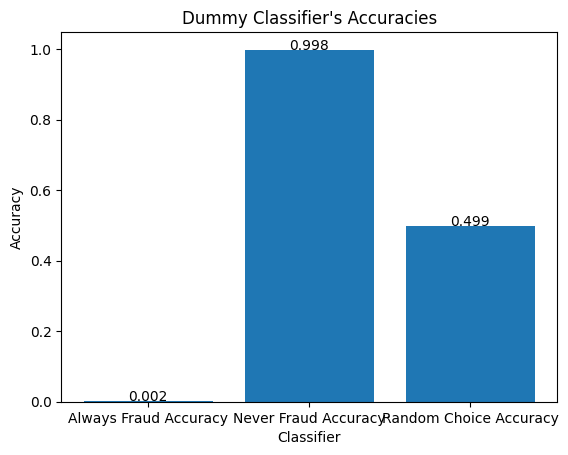

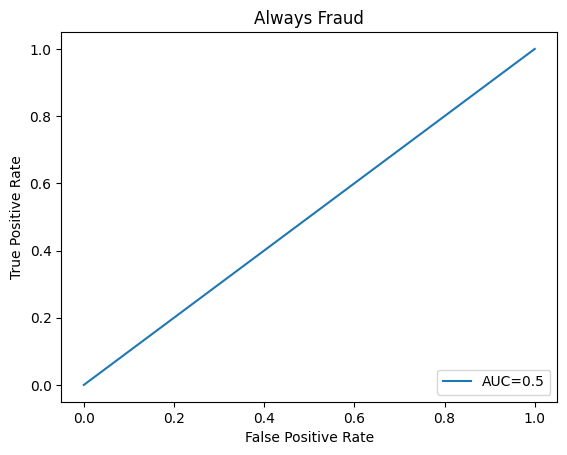

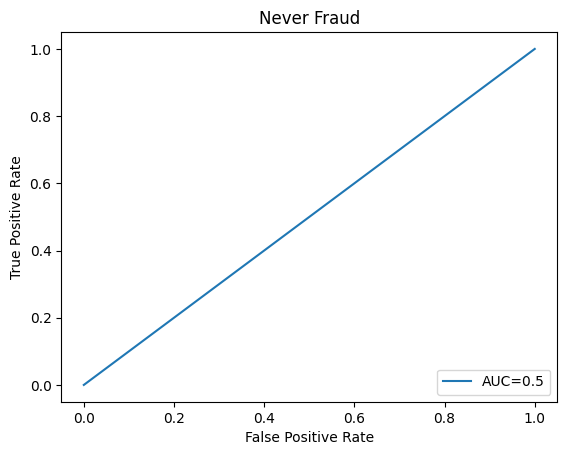

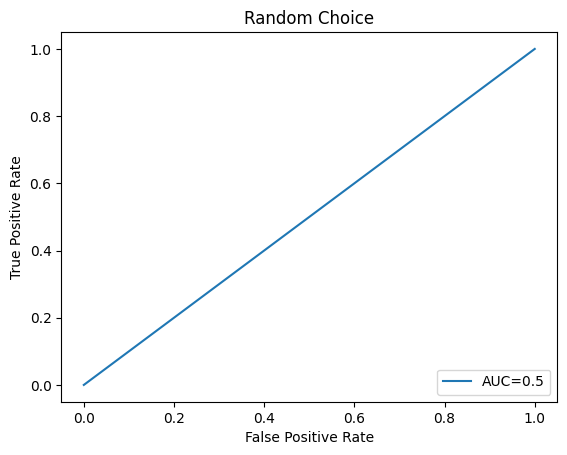

In [8]:
alwaysFraud = DummyClassifier(probability=1)
neverFraud = DummyClassifier(probability=0)
randomChoice = DummyClassifier(probability=0.5)

accuracies = {
    'Always Fraud Accuracy': alwaysFraud.score(X_test, y_test),
    'Never Fraud Accuracy': neverFraud.score(X_test, y_test),
    'Random Choice Accuracy': randomChoice.score(X_test, y_test)
}

barPlotDict(accuracies, xlabel='Classifier', ylabel='Accuracy', title="Dummy Classifier's Accuracies")

plotROCAndAUC(alwaysFraud, X_test, y_test, 'Always Fraud')
plotROCAndAUC(neverFraud, X_test, y_test, 'Never Fraud')
plotROCAndAUC(randomChoice, X_test, y_test, 'Random Choice')

## Question 2
A Neural Network model with the ReLu activation function and 5 hidden layers, each with 20 neurons is created.

For 5 differnt values of alpha "0, 0.01, 0.1, 1 and 10" the fitting process is run

In [9]:
alphaValues = (0.0, 0.01, 0.1, 1, 10)
clfs = {}

for alpha in alphaValues:
  clfs[alpha] = MLPClassifier(hidden_layer_sizes=[20,20,20,20,20],activation='relu', random_state=42, alpha=alpha)

for alpha in alphaValues:
  print(f'Fitting Neural Network with alpha = {alpha}')
  clfs[alpha].fit(X_train, y_train)

Fitting Neural Network with alpha = 0.0
Fitting Neural Network with alpha = 0.01
Fitting Neural Network with alpha = 0.1
Fitting Neural Network with alpha = 1
Fitting Neural Network with alpha = 10


After fitting all models we evaluate them according to the chosen metric: the AUC

After analyzing the different scores for each alpha value it is noticeable that the higher alpha value (10) model underperforms by a large difference the other ones.

The other models perform better as the alpha values increases, seeming to reach a plateau at 0.1 and 1, where the scores are very similar.

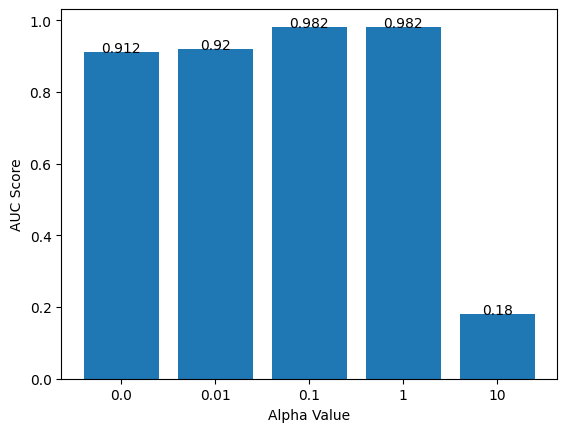

In [10]:
aucScores = {}

for alpha in alphaValues:
  aucScores[str(alpha)] = aucScore(clfs[alpha], X_test, y_test)

barPlotDict(aucScores, xlabel='Alpha Value', ylabel='AUC Score')

## Question 3

Three different configurations of KNN Classifiers are compared using the AUC metric and 3 fold validation. Before all the classifiers run, all the attributes are standardized using a StandardScaler.

After running the train process in all three configurations it is discovered that the best configuration for the KNN is using the 5 closest neighbors

In [11]:
stdGridKnn = Pipeline([
  ('scaler', StandardScaler()),
  ('gridKnn', GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid={'n_neighbors': [3,5,7]}, cv=3, scoring='roc_auc', verbose=True))
])

stdGridKnn.fit(X_train, y_train)

gridKnn = stdGridKnn.named_steps['gridKnn']

display(pd.DataFrame(gridKnn.cv_results_)[['params','rank_test_score','mean_test_score']])

bestKnn = gridKnn.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


,params,rank_test_score,mean_test_score
0,{'n_neighbors': 3},3,0.899636
1,{'n_neighbors': 5},1,0.908856
2,{'n_neighbors': 7},2,0.908820


A similar process is done using MLP Classifiers

Three different configurations of MLP Classifiers are compared using the AUC metric and 3 fold validation.

After running the train process in all three configurations it is discovered that the best configuration for the MLP is with using one hidden layer with 10 neurons

In [12]:
gridMlp =  GridSearchCV(estimator=MLPClassifier(random_state=42),
                        param_grid={'hidden_layer_sizes': [[],[10],[5,5]]}, cv=3, scoring='roc_auc', verbose=True)
gridMlp.fit(X_train, y_train)

display(pd.DataFrame(gridMlp.cv_results_)[['params','rank_test_score','mean_test_score']])

bestMlp = gridMlp.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


,params,rank_test_score,mean_test_score
0,{'hidden_layer_sizes': []},2,0.939567
1,{'hidden_layer_sizes': [10]},1,0.954429
2,"{'hidden_layer_sizes': [5, 5]}",3,0.936799


###a)

After finding out the best configurations for the tested models, both models are compared using the AUC score calculated using the test dataset.

The model the performs the best in the test dataset is the **MLP Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


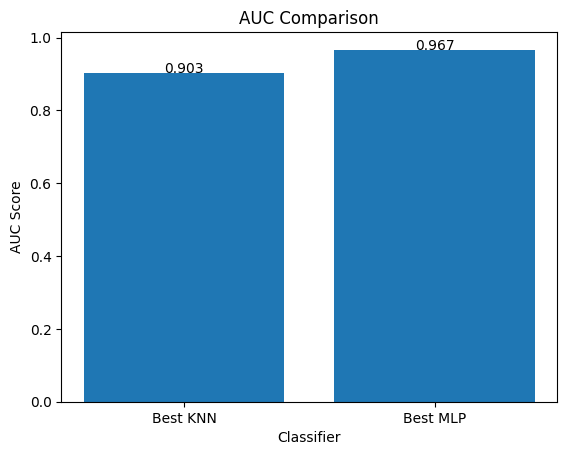

In [13]:
knnAuc = aucScore(bestKnn, X_test, y_test)

mlpAuc = aucScore(bestMlp, X_test, y_test)

barPlotDict({
    'Best KNN': knnAuc,
    'Best MLP': mlpAuc
}, xlabel='Classifier', ylabel='AUC Score', title='AUC Comparison')


###b)

The times elapsed for prediction of the two different models are also compared and it is visible that the KNN Classifier takes much longer to predict the values than the MLP Classifier.

This behavior is expected, because while the MLP Classifier performs a couple of multiplications and sums, the KNN Classifier performs a bunch of eculidean distances calculations and comparisons, thus taking much more time

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


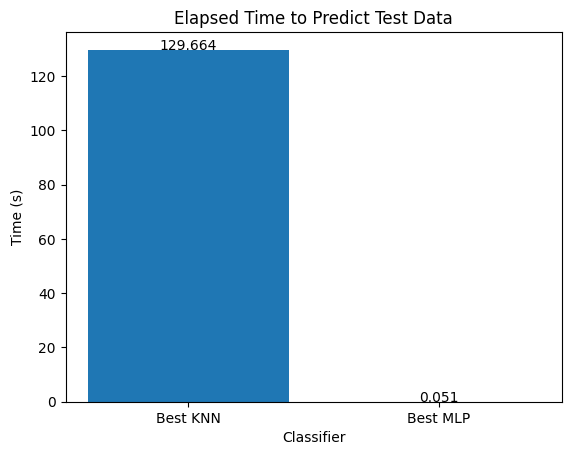

In [14]:
startKnn = time.time()
bestKnn.predict(X_test)
endKnn = time.time()
knnTime = endKnn - startKnn

startMlp = time.time()
bestMlp.predict(X_test)
endMlp = time.time()
mlpTime = endMlp - startMlp


barPlotDict({
    'Best KNN': knnTime,
    'Best MLP': mlpTime
}, xlabel='Classifier', ylabel='Time (s)', title='Elapsed Time to Predict Test Data')

## Question 4

A scenario where the top 1% of the most probable frauds are blocked and each fraud blocked saves R\$100 and each non-fraud blocked costs R\$2 is taken into consideration to imagine a possible model profitability.

Using the best model with it's best configuration (MLP, 1 hidden layer with 10 neurons) the model is able to save R\$16430. 
Even tough it generates more (1235) false-positives than (189) true-positives, as the profit of a true-positive is much higher (50x) than the cost of a false-positive the model is still profittable.

In [15]:
transactions = list(enumerate(bestMlp.predict_proba(X_test)[:,1]))

canceledTransactions = sorted(transactions,key= lambda x:x[1], reverse=True)[: int(0.01 * len(X_test))]

overall = 0
nSuccess = 0
nFailures = 0

for canceledIdx, prob in canceledTransactions:
  isFraud = y_test[canceledIdx]
  if isFraud:
    overall += 100
    nSuccess += 1
  else:
    overall -= 2
    nFailures += 1

print(f'Blocking the top 1% predicted frauds the model succeeded {nSuccess} times and failed {nFailures} times.')
print(f'Taking in account the scenario described by the project the model would save R${overall}')

Blocking the top 1% predicted frauds the model succeeded 189 times and failed 1235 times.
Taking in account the scenario described by the project the model would save R$16430


## Question 5

A neural network with only one layer is used to search for irrelevant attributes in our dataset.

A SGD Classifier is fitted, after an important data standardization, and the weights computed by the model are used to search for irrelevant attributes.

The variables with wheights absolute values near to zero are usually less significant because they are nulled out by the neuron.

In this example it is assumed that any variable with wheight absolute value less than $10^{-2}$ is unimportant. Following these rules the only variable flagged as unimportant is the V28.

As this dataset was probably transformed and cleaned before this analysis it is possible that the less correlated variables were already removed or merged, resulting in a low number of unimportant variables

In [16]:
stdSgd = Pipeline([
  ('scaler', StandardScaler()),
  ('sgd', SGDClassifier(loss='log_loss', random_state=42))
])

stdSgd.fit(X_train, y_train)

sgd = stdSgd.named_steps['sgd']

display(pd.DataFrame(sgd.coef_, columns=[f'V{idx+1}' for idx in range(len(sgd.coef_[0]))]))

variablesWeight = sgd.coef_[0]
tol = 1e-2
unimportantVars = []

for idx,weight in enumerate(variablesWeight):
  if np.abs(weight) < tol:
    unimportantVars.append(f'V{idx+1}')

print(f'The unimportant variables (with W < {tol}) are {unimportantVars}')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.454752,0.833225,-3.390633,9.033902,0.705107,-0.858967,1.604686,-2.999323,-3.433491,-6.81323,...,-0.585051,-2.122281,2.182879,1.894173,-1.242635,-1.130052,-0.789968,0.62081,-0.583422,-0.00689


The unimportant variables (with W < 0.01) are ['V28']
